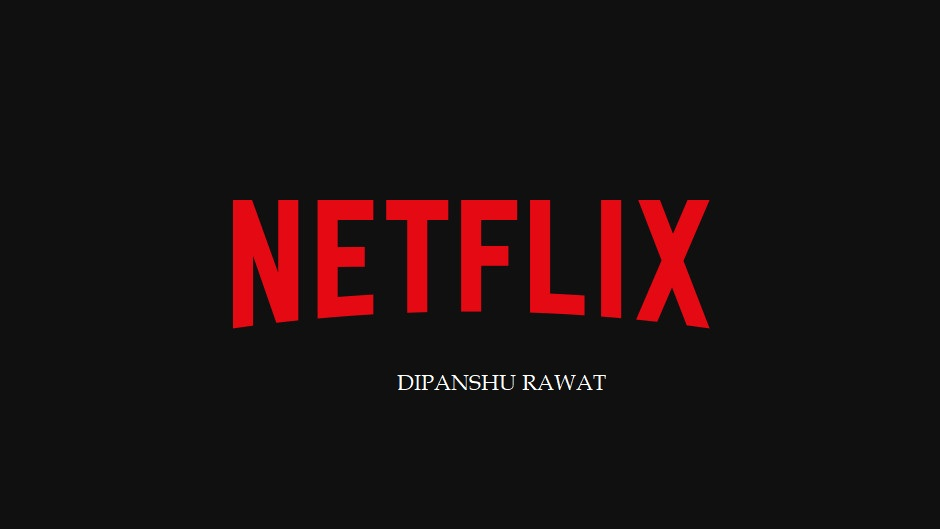

In [1]:
from IPython.display import Image, display

display(Image(filename= "netflix_logo.jpg"))


In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns

In [3]:
netflix = pd.read_csv("netflix1.csv")

In [4]:
netflix

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


In [5]:
#data info
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [6]:
#missing values check 

netflix.isnull().sum()


show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [7]:
#describe 
netflix.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [8]:
#REMOVE duplicates
net_cleaned= netflix.drop_duplicates()

In [9]:
net_cleaned.sum()

show_id         s1s3s6s14s8s9s10s939s13s940s941s942s852s471s73...
type            MovieTV ShowTV ShowMovieMovieTV ShowMovieMovie...
title           Dick Johnson Is DeadGanglandsMidnight MassConf...
director        Kirsten JohnsonJulien LeclercqMike FlanaganBru...
country         United StatesFranceUnited StatesBrazilUnited S...
date_added      9/25/20219/24/20219/24/20219/22/20219/24/20219...
release_year                                             17704670
rating          PG-13TV-MATV-MATV-PGTV-MATV-14PG-13TV-Y7TV-MAT...
duration        90 min1 Season1 Season91 min125 min9 Seasons10...
listed_in       DocumentariesCrime TV Shows, International TV ...
dtype: object

In [10]:
net_cleaned["director"].fillna("Not Given", inplace= True)

In [11]:
net_cleaned.dropna(subset= ["country"],inplace= True)

In [12]:
#data transformationn
#this is for data format correction it will allow to convert as y-m-d

net_cleaned["date_added"]= pd.to_datetime(net_cleaned["date_added"])
net_cleaned.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [13]:
#creating a new col name category

net_cleaned["category"] = net_cleaned["type"].astype("category")
net_cleaned

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,category
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,Movie
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",TV Show
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",TV Show
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",Movie
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",Movie
...,...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas",TV Show
8786,s8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,TV Show
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",TV Show
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,Kids' TV,TV Show


In [14]:
#Counts
type_counts = net_cleaned['type'].value_counts()
print(type_counts)


type
Movie      6126
TV Show    2664
Name: count, dtype: int64


In [15]:
#import plt lib
import matplotlib.pyplot as plt

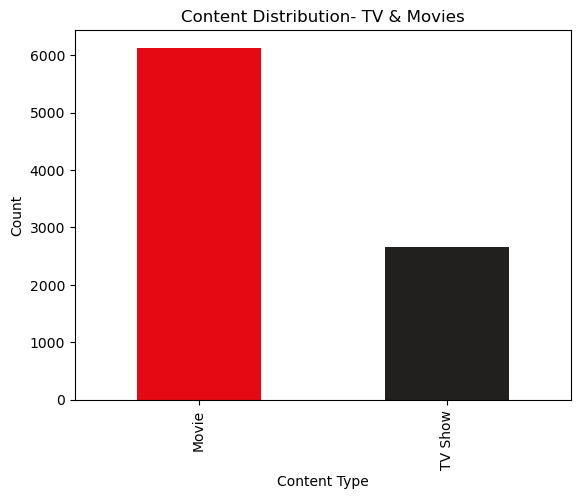

In [16]:
netflix_clrs = ('#E50914', '#221F1F')
type_counts.plot(kind = "bar", color= netflix_clrs, title  =  "Content Distribution- TV & Movies")
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.title("Content Distribution- TV & Movies")
plt.show()

In [17]:
#one probmlem i faced that there is huge missing data in directors col so i drop those and filter only to directors name
del_d = net_cleaned[net_cleaned["director"] != "Not Given"].dropna(subset = ["director"])
top_directors = del_d["director"].value_counts().head()
top_directors

director
Rajiv Chilaka             20
Raúl Campos, Jan Suter    18
Alastair Fothergill       18
Marcus Raboy              16
Suhas Kadav               16
Name: count, dtype: int64

Text(0.5, 1.0, 'Top Directors in NETFLIX')

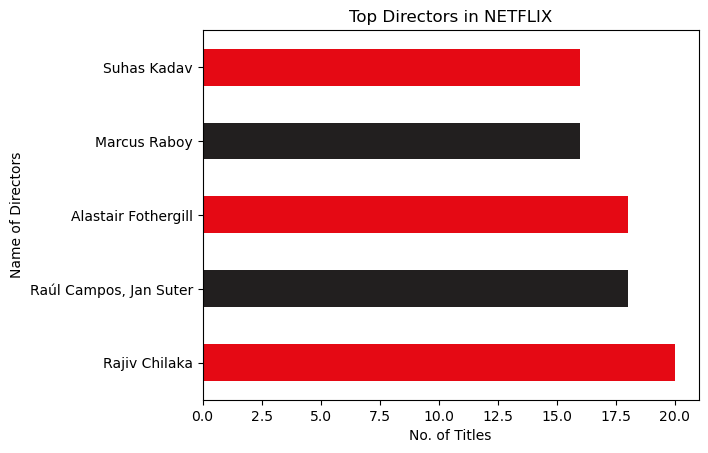

In [18]:
#after removing Not Given values i can see directors name easily
top_directors.plot(kind = "barh", color = netflix_clrs, title = ("Top Directors in NETFLIX"))
plt.xlabel("No. of Titles")
plt.ylabel("Name of Directors")
plt.title("Top Directors in NETFLIX")

In [19]:
#Release Trends over time 

In [20]:
release_trends = net_cleaned["release_year"].value_counts().sort_index()

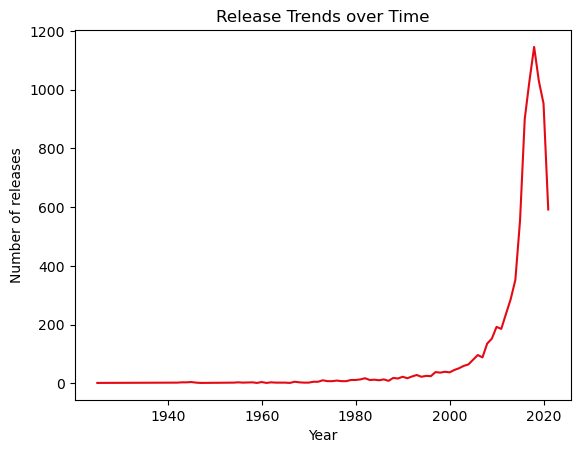

In [21]:
release_trends.plot(kind = "line", color = netflix_clrs, title = "Release Trends over Time")
plt.xlabel("Year")
plt.ylabel("Number of releases")
plt.show()

In [22]:
top_countries = net_cleaned["country"].value_counts().head(10)
top_countries

country
United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
Canada             271
Japan              259
South Korea        214
France             213
Spain              182
Name: count, dtype: int64

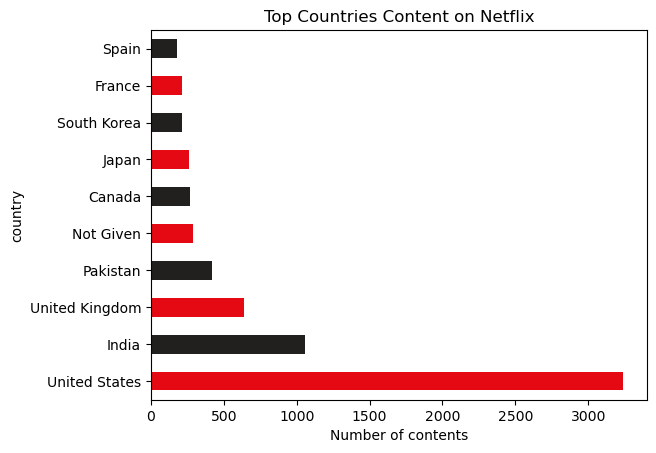

In [23]:
top_countries.plot(kind = "barh", color = netflix_clrs, title = "Top Countries Content on Netflix")
plt.xlabel("Number of contents")
plt.show()

In [24]:
#Extracting the Rating Distribution 
rating_distribution =  net_cleaned["rating"].value_counts()


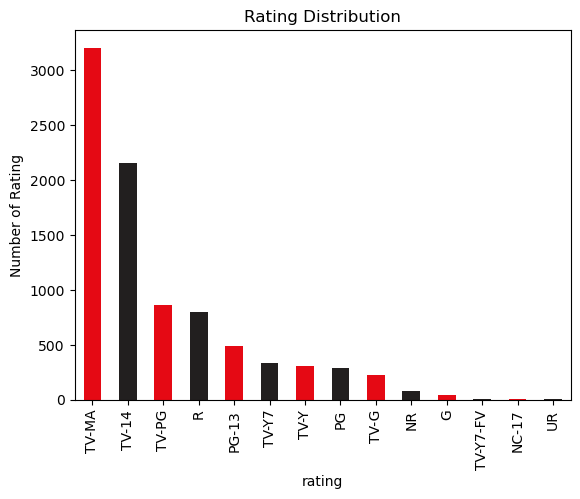

In [25]:
rating_distribution.plot(kind = "bar", color = netflix_clrs,title = "Rating Distribution")
plt.ylabel("Number of Rating")
plt.show()

C:\Users\MANMOHAN\AppData\Local\Temp\ipykernel_8652\2945144924.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration'] = movies['duration'].str.replace(' min', '').astype(int)


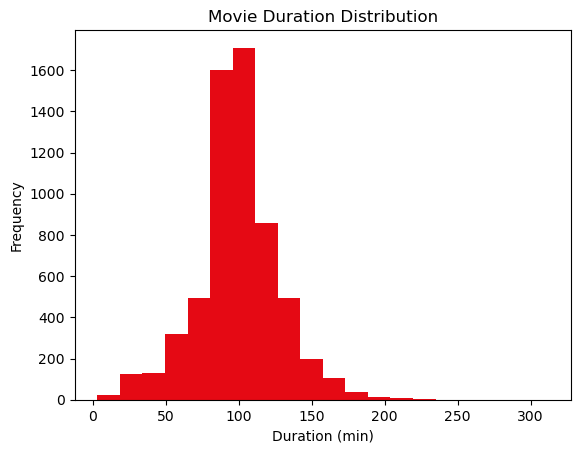

C:\Users\MANMOHAN\AppData\Local\Temp\ipykernel_8652\2945144924.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows['seasons'] = tv_shows['duration'].str.replace(' Season', '').str.replace('s', '').astype(int)


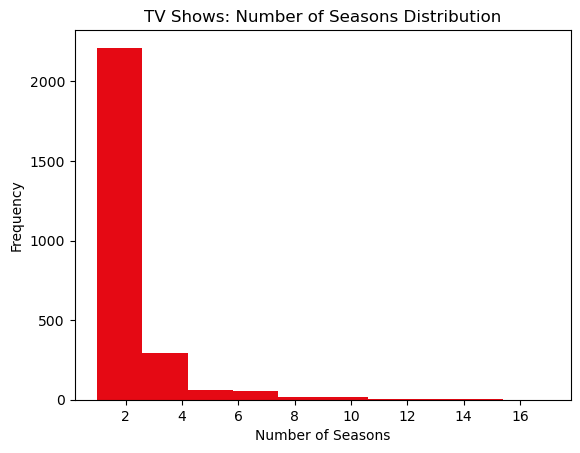

In [37]:
# first separate movies and TVshows
movies = net_cleaned[net_cleaned['type'] == 'Movie']
tv_shows = net_cleaned[net_cleaned['type'] == 'TV Show']

# Analyzing movie durations
movies['duration'] = movies['duration'].str.replace(' min', '').astype(int)
movies['duration'].plot(kind='hist',color = netflix_clrs, bins=20, title='Movie Duration Distribution')
plt.xlabel('Duration (min)')
plt.show()

# Analyzing number of seasons for TV Shows
tv_shows['seasons'] = tv_shows['duration'].str.replace(' Season', '').str.replace('s', '').astype(int)
tv_shows['seasons'].plot(kind='hist', color = netflix_clrs, bins=10, title='TV Shows: Number of Seasons Distribution')
plt.xlabel('Number of Seasons')
plt.show()


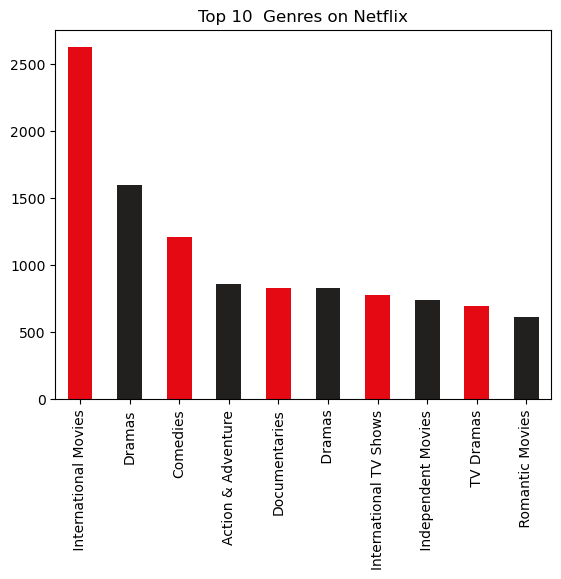

In [38]:
#Popular categories

net_cleaned["categories"] = net_cleaned["listed_in"].str.split(',')

from collections import Counter
genres =  net_cleaned["categories"].explode()
genre_counts = Counter(genres)


pd.Series(genre_counts).nlargest(10).plot(kind="bar", color= netflix_clrs,title= "Top 10  Genres on Netflix")
plt.show()

In [39]:
#top content by year 
content_2021 = net_cleaned[net_cleaned["release_year"]== 2021]
print(content_2021["type"].value_counts())

type
TV Show    315
Movie      277
Name: count, dtype: int64


In [ ]:
#pie


# ADVANCE ANALYSIS - ML


In [40]:
#feature  Engineering 
net_cleaned["year_added"] = pd.DatetimeIndex(net_cleaned["date_added"]).year
net_cleaned["month_added"] = pd.DatetimeIndex(net_cleaned["date_added"]).month

net_cleaned["num_genres"]= net_cleaned["listed_in"].apply(lambda x: len(x.split(",")))

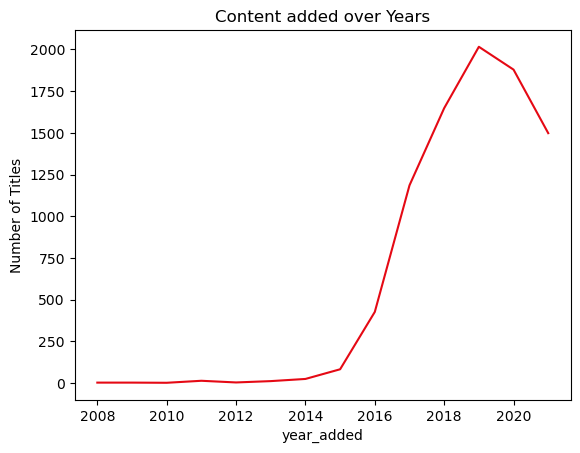

In [41]:
#content over years

content_by_year = net_cleaned.groupby("year_added").size()
content_by_year.plot(kind = "line",color = netflix_clrs,title = "Content added over Years")
plt.xlabel("year_added")
plt.ylabel("Number of Titles")
plt.show()

# Machine learning 

# problem 
'Predict whether a title is a TV Show or a Movie based on features like release_year, duration, num_genres, etc.

Prepare the Data for Machine Learning

Label encode categorical features like country, director, listed_in.
Split the dataset into features (X) and target (y).
Standardize or normalize the numeric features.

In [42]:
#this is for error = ValueError: could not convert string to float: '2 Seasons' i want to remove season or min text  behind from this].\

# so Separate duration for movies (minutes) and TV shows (seasons)
def clean_duration(duration):
    if 'Season' in duration:
        return int(duration.split()[0])  # Extract number of seasons
    elif 'min' in duration:
        return int(duration.split()[0])  # Extract duration in minutes
    else:
        return np.nan  # Handle any unexpected formats

# Apply the function to the 'duration' column in net_cleaned
net_cleaned['cleaned_duration'] = net_cleaned['duration'].apply(clean_duration)

# Verify the changes
print(net_cleaned[['duration', 'cleaned_duration']].head())


   duration  cleaned_duration
0    90 min                90
1  1 Season                 1
2  1 Season                 1
3    91 min                91
4   125 min               125


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler


In [44]:
#Encoding categorical labels

le = LabelEncoder()
net_cleaned["country_encoded"] = le.fit_transform(net_cleaned["country"])
net_cleaned["director_encoded"] = le.fit_transform(net_cleaned["director"])

In [49]:
# Define features and target
features = ['release_year', 'num_genres', 'cleaned_duration', 'country_encoded', 'director_encoded']
X = net_cleaned[features]
y = net_cleaned['type'].apply(lambda x: 1 if x == 'Movie' else 0)  # Binary encoding

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [50]:
#Train ML Model
from sklearn.linear_model import  LogisticRegression
from  sklearn.metrics import accuracy_score, classification_report

In [60]:
#initializing and train the model 
model = LogisticRegression()
model.fit(X_train_scaled,y_train)
 
    #predictions
y_pred = model.predict(X_test_scaled)
print(f"Accuracy: {accuracy_score(y_test,y_pred):.2f}")
print(classification_report(y_test,y_pred))

Accuracy: 1.00
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       780
           1       1.00      1.00      1.00      1857

    accuracy                           1.00      2637
   macro avg       1.00      1.00      1.00      2637
weighted avg       1.00      1.00      1.00      2637



# Model Evaluation and Interpretation

In [61]:
from  sklearn.ensemble import RandomForestClassifier

In [62]:
X_train_scaled 

array([[ 0.65450203,  1.02455865, -1.32783734,  0.91580708,  0.45729923],
       [ 0.08081745,  1.02455865, -1.34749379,  0.91580708,  0.45729923],
       [-1.29602552,  1.02455865, -1.34749379, -0.15894451,  0.45729923],
       ...,
       [-0.14865638,  1.02455865,  0.97196713, -1.04177617, -2.03326309],
       [-1.98444701, -0.2523523 ,  0.65746396, -1.7710719 , -0.16839994],
       [ 0.31029128, -0.2523523 , -1.32783734,  0.41681527,  0.45729923]])

In [63]:
#train random forest model 
ref_model = RandomForestClassifier(n_estimators= 100,random_state= 42)
ref_model.fit(X_train_scaled, y_train)

#predictions

y_pred_ref = ref_model.predict(X_test_scaled)
y_pred_ref

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

In [64]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions and evaluate
y_pred_rf = rf_model.predict(X_test_scaled)
print(f'Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}')
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       780
           1       1.00      1.00      1.00      1857

    accuracy                           1.00      2637
   macro avg       1.00      1.00      1.00      2637
weighted avg       1.00      1.00      1.00      2637



  # Summary 

 -----------
# Netflix Content Analysis Overview
This analysis focuses on the top genres, countries, release trends over the years, and top directors contributing to the Netflix catalog. The dataset consists of a mix of movies and TV shows.

1. Top Genres for Movies:
International Movies dominate the Netflix catalog, followed by Dramas.
Romantic Movies, despite being popular, have significantly fewer releases compared to other genres, indicating a loss of prominence in recent years.

2. Country-Wise Content Distribution:
The USA is by far the leading country in terms of content production, contributing the majority of titles on Netflix.
In contrast, Spain produces comparatively fewer titles, showing lower representation in the dataset.

3. Release Trends by Year:
1940 saw the lowest number of releases, with very few titles from this time period present in the dataset.
Between 2000 and 2020, there has been a significant surge in content releases, marking the highest period of content production on Netflix.
Releases before 2000 were relatively low, suggesting that Netflix's growth aligns with the increasing production of digital content in the 21st century.

4. Top Directors:
Rajiv Chilaka stands out as the most prolific director with 20 titles to his name, contributing significantly to the Netflix library.
Raúl Campos and Jan Suter are close behind with an impressive near 17 titles, solidifying their positions as key content creators.

5. Content Type Distribution:
Movies dominate Netflix, with approximately 6,000 titles compared to around 2,500 TV shows.
This suggests that while Netflix is known for both movies and series, movies remain the majority content type.
Prediction for Future Content Trends:
Given the current trends in the dataset, we can make some educated predictions for the future of Netflix content:

Continued Dominance of USA-Produced Content: The USA will likely continue to be the leading contributor to Netflix’s catalog, with more content being sourced from diverse genres.

Increasing Focus on International Markets: While Spain currently has lower representation, Netflix's recent expansion into non-English speaking markets suggests that countries like Spain, India, and South Korea will see an increase in content production in the near future.

Growing Emphasis on TV Shows: Although movies currently dominate Netflix's catalog, the popularity of binge-watching culture may lead to an increasing share of TV shows over time.

Directors and Genres: Directors with proven track records (like Rajiv Chilaka and Raúl Campos) are expected to continue releasing more content, while genres like International Movies and Dramas will remain popular, with Romantic Movies potentially seeing a resurgence.

Machine Learning Model Prediction:
Based on these patterns, a classification model can predict whether a Netflix title is a Movie or TV Show using features such as:

Release year
Duration (or number of seasons for TV shows)
Number of genres the title falls under
Country of origin
Here's how the machine learning workflow is structured:

Data Preprocessing: Categorical features (like country, director) are encoded. Numeric features (like release year, duration) are standardized.

Model Training: The dataset is split into training and test sets, and a Logistic Regression model or Random Forest model is trained to classify content as a movie or a TV show.

Model Prediction: The model predicts the content type with a high accuracy score, based on historical data.

Evaluation: The model's performance is evaluated through metrics like accuracy, precision, recall, and the F1-score, helping to assess how well it distinguishes between movies and TV shows.

Conclusion:
Netflix's dataset reveals a strong dominance of movies, particularly from the USA, and a significant rise in content releases over the last two decades. Directors like Rajiv Chilaka lead in terms of contributions, and we can expect to see similar trends continue as Netflix grows its global footprint.

-------------------------------------------------------------------------------------------------------------------------------

### Thank You 
### Dipanshu Rawat
####     (Data Analyst)